<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Statistical_Moments_and_Normality_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [0]:
# Useful Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera

# 1: Testing for Skew

### Artificial Example

Use the results from the `stats.skew` function to determine the skew of the artificial distribution named X.

Skew: 0.26474831096388496
The distribution is positively skewed


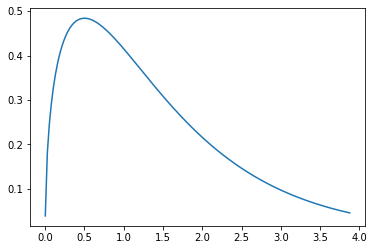

In [3]:
xs2 = np.linspace(stats.gamma.ppf(0.01, 0.7, loc=-1), stats.gamma.ppf(0.99, 0.7, loc=-1), 150) + 1

X = stats.gamma.pdf(xs2, 1.5)

skew = stats.skew(X)

plt.plot(xs2, X)

print ('Skew:', skew)
if skew > 0:
    print ('The distribution is positively skewed')
elif skew < 0:
    print ('The distribution is negatively skewed')
else:
    print ('The distribution is symmetric')

### Real Example

Use the results from the `stats.skew` function to determine the skew of the returns of NFLX and use it to make a conclusion about the symmetry of the stock's returns.

In [0]:
start = '2015-01-01'
end = '2016-01-01'
pricing = get_pricing('NFLX', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

skew = stats.skew(returns)

plt.hist(returns, 30)

print ('Skew:', skew)
print ('The returns of NFLX have a strong positive skew, meaning their volatility is characterized by frequent small changes in price with interspersed large upticks.')

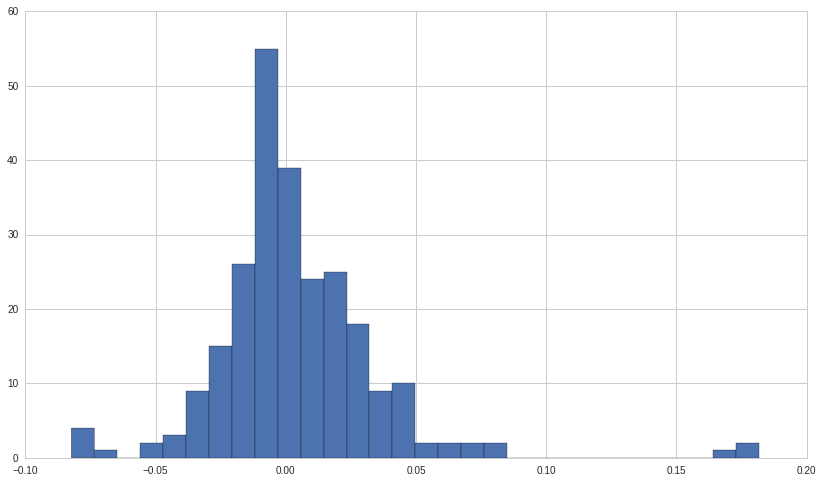

# 2: Testing for Kurtosis
### a. Artificial Example

Use the results from the `stats.kurtosis` function to determine the excess kurtosis of the artificial distribution named Y.

Excess kurtosis of Y: -0.6344720164161468
Because the excess kurtosis is negative, Y is platykurtic. Platykurtic distributions cluster around the mean, so large values in either direction are less likely


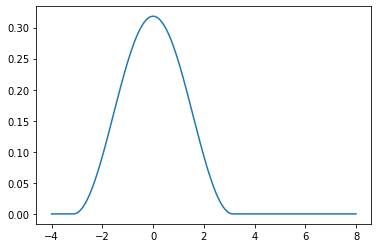

In [5]:
xs = np.linspace(-6,6, 300) + 2 

Y = stats.cosine.pdf(xs)

plt.plot(xs, Y)

print ('Excess kurtosis of Y:', (stats.kurtosis(Y)))
print ('Because the excess kurtosis is negative, Y is platykurtic. Platykurtic distributions cluster around the mean, so large values in either direction are less likely')

#3: Skew and Normality
### Artificial Example II

Use the results from the `stats.skew` function to determine the skew of the artificial distribution named Z.

In [7]:


xs2 = np.linspace(stats.lognorm.ppf(0.01, 0.7, loc=-.1), stats.lognorm.ppf(0.99, 0.7, loc=-.1), 150)

lognorm = stats.lognorm.pdf(xs2, 0.4)

Z = lognorm/2 + lognorm[::-1]

skew = stats.skew(Z)

print ('Skew:', skew)
if skew > 0:
    print ('The distribution is positively skewed')
elif skew < 0:
    print ('The distribution is negatively skewed')
else:
    print ('The distribution is symmetric')



Skew: 1.1121491036049673
The distribution is positively skewed


#Jarque-Bera Calibration

Ensure that the `jarque-bera` function is calibrated by running it on many trials of simulated data and ensuring that the sample probability that the test returns a result under the p-value is equal to the p-value.

In [8]:
N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

num_significant = len(pvalues[pvalues < 0.05])

print (float(num_significant) / N)
print ('Our answer is around 5%, which is what we would expect for a cutoff of 5% and a correctly-calibrated Jarque-Bera test.')

0.052
Our answer is around 5%, which is what we would expect for a cutoff of 5% and a correctly-calibrated Jarque-Bera test.


##Jarque-Bera Test

Use the `Jarque-Bera` function to determine the normality of Z.

In [9]:
_, pvalue, _, _ = jarque_bera(Z)

print (pvalue)
if pvalue > 0.05:
    print ('The returns are likely normal.')
else:
    print ('The returns are likely not normal.')

1.6768991741743907e-07
The returns are likely not normal.


#Skewness and Normality

Plot Z and observe that skewness is not informative unless the underlying distribution is somewhat normal.

The positive skew found in part a would have led us to believe values are concentrated below the mean and a tail extends to the right, however this is not the case. Because Z is bimodal, we can make no conclusions based on the skewness value alone. In order for skewness to be useful, the underlying distribution must be somewhat normal


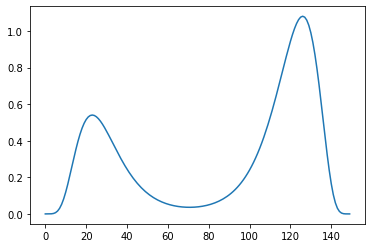

In [12]:
plt.plot(Z)

print ('The positive skew found in part a would have led us to believe values are concentrated below the mean and a tail extends to the right, however this is not the case. Because Z is bimodal, we can make no conclusions based on the skewness value alone. In order for skewness to be useful, the underlying distribution must be somewhat normal')

#Out of Sample Test
##a. Testing for Normality

Plot a histogram of the historical returns of AMC to ensure it is unimodal and vaguely normal before testing it for skewness in part b.

In [0]:
start = '2014-01-01'
end = '2016-01-01'
pricing = get_pricing('AMC', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

print ('The returns of AMC from 2014 through 2016 are unimodal and vaguely normal, so a skewness measure would be relevant.')

plt.hist(returns, 30);

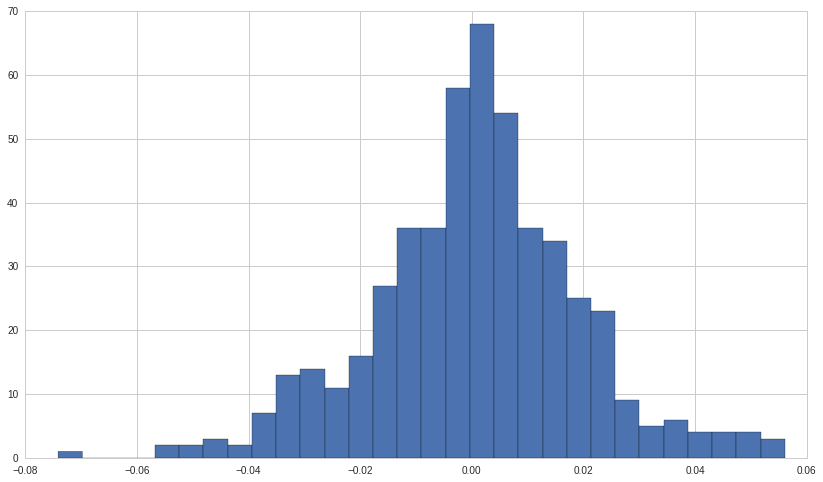

The returns of AMC from 2014 through 2016 are unimodal and vaguely normal, so a skewness measure would be relevant.

##Test for Skew

Find the skew of the historical returns of AMC between 2014 to 2016.

In [0]:
start = '2014-01-01'
end = '2016-01-01'
pricing = get_pricing('AMC', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

print ('Skew of AMC:', stats.skew(returns))

##Out of Sample Test

Find the skew of the historical retunrs of AMC from the first half of 2016 to determine if the skew from part b holds outside of the original sample.

In [0]:
start = '2016-01-01'
end = '2016-07-01'
out_pricing = get_pricing('AMC', fields='price', start_date=start, end_date=end)
out_returns = out_pricing.pct_change()[1:]

print ('Skew of AMC:', stats.skew(out_returns))
print ('The negative skew of AMC between 2014 and 2016 did not hold outside of the orignal sample, meaning the skew of AMC might be volatile and not reliable enough for predictions about future behavior.')

#Rolling Skew

Plot the rolling skew of AMC using the `pd.rolling_skew` function.

In [0]:
AMC = get_pricing('AMC', fields='price', start_date='2015-01-01', end_date='2017-01-01')

rolling_skew = AMC.rolling(window=60,center=False).skew()
plt.plot(rolling_skew)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Skew')
print ("This confirms our result from part c, that the skew is too volatile to use it to make predictions outside of the sample.")

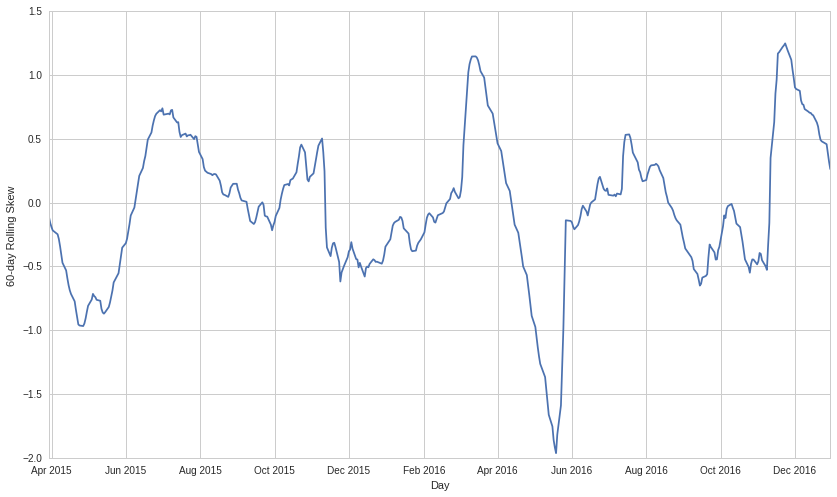

This confirms our result from part c, that the skew is too volatile to use it to make predictions outside of the sample.